In [1]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)
  data_path = 'gdrive/MyDrive/cds-project/data/emotions-nlp/' # Replace with path to datasets in your g drive
else:
  data_path = '../data/emotions-nlp/' # Replace with path to datasets on local machine
print("Reading dataset from path " + data_path)

Mounted at /content/gdrive
Reading dataset from path gdrive/MyDrive/cds-project/data/emotions-nlp/


In [2]:
# Import dataset
import pandas as pd
columns = ['text', 'emotion']
df_train = pd.read_csv(data_path + 'train.txt', header=None, sep=';', names=columns, encoding='utf-8')
df_test = pd.read_csv(data_path + 'test.txt', header=None, sep=';', names=columns, encoding='utf-8')
df_val = pd.read_csv(data_path + 'val.txt', header=None, sep=';', names=columns, encoding='utf-8')

In [5]:
# Check data distribution
import seaborn as sns
import matplotlib.pyplot as plt

def plot_single_dataset_count(df, df_name, emotion_column):
    title = df_name
    
    sns.countplot(x=df[emotion_column].sort_values())
    plt.suptitle(title)
    plt.show()

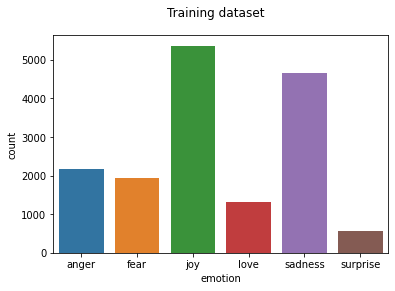

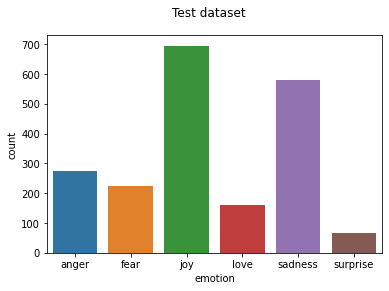

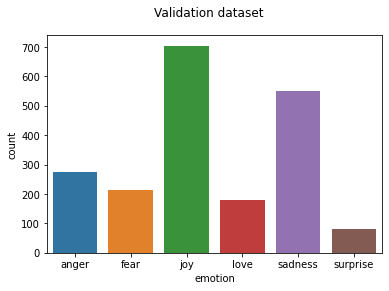

In [6]:
plot_single_dataset_count(df_train, "Training dataset", 'emotion')
plot_single_dataset_count(df_test, "Test dataset", 'emotion')
plot_single_dataset_count(df_val, "Validation dataset", 'emotion')

In [7]:
# Remove stopwords
import nltk, string, re

nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

def clean_text(text):
  text = text.lower() # Convert to lowercase
  text = " ".join([word for word in text.split() if word not in stopwords]) # Remove stopwords
  text = re.sub('\s+', ' ', text) # Remove extra spaces
  text = re.sub("[^-9A-Za-z ]", " ", text) # Remove punctuation
  return text

df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)
df_val['text'] = df_val['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
# Export cleaned text to csv
df_train.to_csv(data_path + 'processed_train.csv', index=False)
df_test.to_csv(data_path + 'processed_test.csv', index=False)
df_val.to_csv(data_path + 'processed_val.csv', index=False)